In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
data_train_path = "./sloth-recognizer/Animals/data/train"
data_test_path = "./sloth-recognizer/Animals/data/test"
data_val_path = "./sloth-recognizer/Animals/data/val"

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 7603 files belonging to 3 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['cat', 'dog', 'sloth']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 3524 files belonging to 3 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)
    

Found 1192 files belonging to 3 classes.


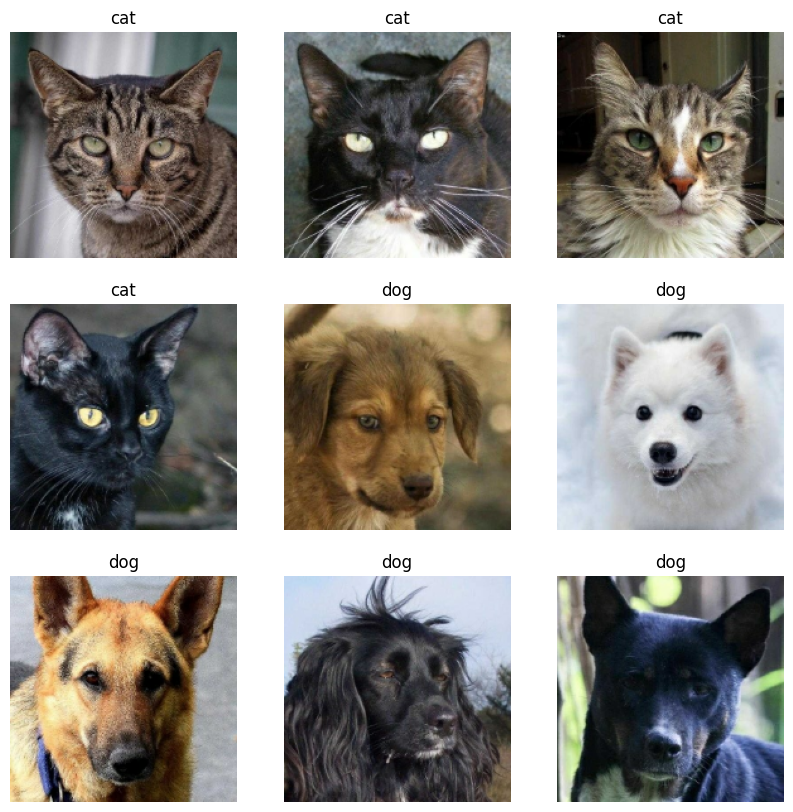

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.7016 - loss: 1.0006 - val_accuracy: 0.9188 - val_loss: 0.2154
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.9343 - loss: 0.1915 - val_accuracy: 0.9526 - val_loss: 0.1483
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9657 - loss: 0.1054 - val_accuracy: 0.9572 - val_loss: 0.1570
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9747 - loss: 0.0714 - val_accuracy: 0.9560 - val_loss: 0.1778
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9791 - loss: 0.0618 - val_accuracy: 0.9549 - val_loss: 0.1624
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9884 - loss: 0.0332 - val_accuracy: 0.9611 - val_loss: 0.1773
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9872 - loss: 0.0356 - val_accuracy: 0.9549 - val_loss: 0.2474
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.9882 - loss: 0.03

Text(0.5, 1.0, 'Loss')

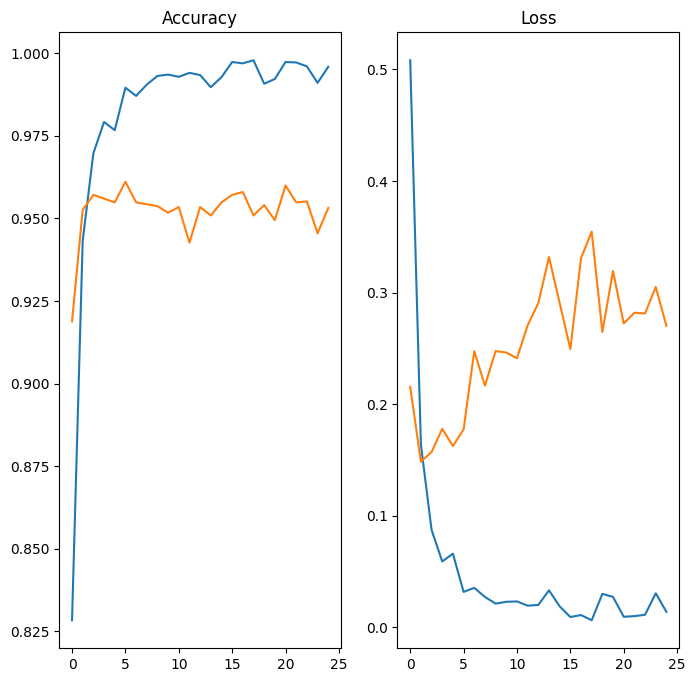

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = 'sloth-recognizer/Sloth.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [19]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [20]:
score = tf.nn.softmax(predict)

In [21]:
print('O animal na imagem é um {} com a precisão de {:0.2f}%'.format(data_cat[np.argmax(score)],np.max(score)*100))

O animal na imagem é um sloth com a precisão de 100.00%


In [22]:
model.save('Image_classify.keras')